In [1]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3 
!pip install torch

!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 145 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 13.8 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=619642 sha256=1f52edfa84297cc6f823a50b3f9858a4b5730e6f4dd7fd3faefc59611026679d
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 28.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [4]:
##GPU 사용 시
device = torch.device("cuda:0")

bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [7]:
!ls

자연어처리_1.ipynb		  item_all_doc2vec_k-means.csv
자연어처리_2.ipynb		  item_all_GloVe_DBSCAN.csv
all_df_with_tokens.csv		  item_all_glove_k-means.csv
all_sen.csv			  ko.bin
cc.ko.300.bin.gz		  list_to_csv.csv
df_all				  nlp_tokenizer.ipynb
df_all.csv			  스포츠_sen.csv
df_all_GloVe.csv		  sen.csv
df_all_tfidf.csv		  sen_preprocessig.csv
doc2vec_100.model		  스포츠_sen_prerprocessing.csv
feature.pkl			  sentence_Summarizer.ipynb
feature.pkl.mtx			  textrank
first_embedding_clustering.model  textrank_git
glove_model_100.model		  tfidftransformer.pkl
glove_model.model		  자연어처리_tomotopy_HDPModel.ipynb
glove_word_dict_128.pickle	  자연어처리_tomotopy.ipynb
item_1.csv			  자연어처리_tomotopy_modeling.ipynb
item_all_최종.csv		  vectorizer.pkl
item_all.csv			  word2vec_model


In [115]:
import pandas as pd
df = pd.read_csv('item_all_doc2vec_k-means.csv')
df = df.iloc[:,[2, 1]]
df

,convrs,cluster
0,당신이 골프 조금 친다고 당장에 우리 집이 어떻게 되는 것도 아니라고,0
1,그래서 어제 봤던 사람도 이년 반밖에 안 됐는데 친구들이랑 가면,0
2,나는 친구 믿고서는 하여튼 열심히 해 갖고 같이 한 번 나가 보자고,0
3,그러면 집에 왔던 차림으로 가면 되는데 골프는 옷을 갖춰야 돼,0
4,우리가 공유할 수 있는 걸 하면 좋겠어 나는 골프를 하고 싶은 생각이 없거든,0
...,...,...
2002,예전에는 게을러서 날씨 핑계 대고 그랬는데 수영은 날씨랑 상관도 없잖아,9
2003,내가 전에 우리 스트레칭 시간에 선생님이 일이 있어서 그 대신,9
2004,이번 주부터 수영을 시작했는데 나는 수영을 선택하기 잘한 것 같아,9
2005,첫날 요가하고 나오는데 너무 시원한 거야 몸이 풀리는 느낌이었어,9


In [9]:
df.isnull().sum()

convrs     0
cluster    0
dtype: int64

In [116]:
np.unique(df.cluster)

array([0, 2, 3, 4, 5, 6, 7, 9])

In [ ]:
idx = df[df['cluster']==5].index
df = df.drop(idx)

In [ ]:
np.unique(df.cluster)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12])

In [117]:
df.loc[(df['cluster']== 3), 'cluster'] = 0

In [118]:
#df.loc[(df['cluster']== 5), 'cluster'] = 4

df.loc[(df['cluster']== 6), 'cluster'] = 4
#df.loc[(df['cluster']== 4), 'cluster'] = 3
np.unique(df.cluster)


array([0, 2, 4, 5, 7, 9])

In [119]:
df.loc[(df['cluster']== 2), 'cluster'] = 1
df.loc[(df['cluster']== 4), 'cluster'] = 2
df.loc[(df['cluster']== 5), 'cluster'] = 3
df.loc[(df['cluster']== 7), 'cluster'] = 4
df.loc[(df['cluster']== 9), 'cluster'] = 5

In [167]:
df.loc[(df['cluster']==5), 'cluster'] = 4

In [168]:
np.unique(df.cluster)

array([0, 1, 2, 3, 4])

In [230]:
inw = df.loc[df['cluster']==0]
inw[:10:2]

,convrs,cluster
0,당신이 골프 조금 친다고 당장에 우리 집이 어떻게 되는 것도 아니라고,0
2,나는 친구 믿고서는 하여튼 열심히 해 갖고 같이 한 번 나가 보자고,0
4,우리가 공유할 수 있는 걸 하면 좋겠어 나는 골프를 하고 싶은 생각이 없거든,0
6,내가 산에 갈 때마다 그 친구가 생각이 나 같이 갈 때가 좋았는데 싶어서,0
8,그래서 주말마다 골프를 배워보는 것도 참 좋을 것 같다는 생각을 해봤어,0


In [231]:
df.to_csv('final_trainingset_sports.csv')

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['convrs'], df['cluster'], stratify=df['cluster'], test_size=0.2, shuffle=True, random_state=34)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, stratify=y_test, test_size=0.5, shuffle=True, random_state=34)

In [195]:
train = []
for q, label in zip(x_train, y_train)  :
    data = []
    data.append(q)
    data.append(str(label))

    train.append(data)

In [196]:
test = []
for q, label in zip(x_test, y_test)  :
    data = []
    data.append(q)
    data.append(str(label))

    test.append(data)

In [197]:
val = []
for q, label in zip(x_val, y_val)  :
    data = []
    data.append(q)
    data.append(str(label))

    val.append(data)

In [198]:
len(train)

1605

In [176]:
train

[['우리 배우자도 자세를 다시 교정하는 데 진짜 애를 먹었거든', '4'],
 ['어 운동은 많이 했지 대단한 것은 아니고  당구나 볼링 야구 정도', '0'],
 ['그럴 수도 있겠다 나도 거기까지는 미처 생각을 못 했었는데 다행이네', '0'],
 ['솔직히 그래서 그  감독 대행을 만나면은 나는 그런 얘기라도 좀 하고 ', '1'],
 ['그렇게 해요 서로 노력하면서 근데 동아리는 좋아하는 사람들만 모인 데잖아', '0'],
 ['하지만 작심삼일을 계속 반복하다 보면 요가 같은 경우  몸이 적응을 하겠지', '3'],
 ['체육 시설이나 이런 것들에 대해 하는 생각이나 관점이 있을 것 아니야', '0'],
 ['여자끼리 하면 공이 오는 게 틀리거든 친구는 틀리더라고', '2'],
 ['오분이면 되는 거리인데 혼자서 사십분 걸리니까 사람들이 찾으러 오고', '0'],
 ['그렇다고 해도 내가 봤을 땐 그 사람들도 처음부터 그렇게는 안 샀을 거 같아', '0'],
 ['예를 들면  스윙을 할 때 어떻게 하고  임펙트는 어떻게 가는지 스타일이 필요해', '0'],
 ['그렇게 주는 거 같더라고 자기가 그래 가지고 그거를 그렇게 했어', '0'],
 ['그러니까 돈이 많으면 얼마나 좋을까  뭐 그런 생각을 계속하게 되더라고', '0'],
 ['기아  타이거즈 같은 경우는 한번 딱 반짝 그렇게 하고 말아서  그게 참 아쉽더라고', '1'],
 ['그래도 요가는 안 해 본 것이라 자네가 집에서 좀 가르쳐 줘야 될 거 같아', '4'],
 ['탁구가 나이 먹어서는 할 수 있는 운동 중에 그래도 제일 괜찮은 것 같애', '0'],
 ['그래서 그런 걸 볼 때 코치나 감독이 여자 선수들을 함부로 못 했으면 좋겠어', '2'],
 ['요즘 야구장에 사람들이 통 없더라고 여름 되고 나서 날이 더워서 그런가', '1'],
 ['진심으로 팬으로서 진짜 그냥 일반적인 마음이 아니라 그런 얘기를 좀 전하고 싶어', '0'],
 ['그리고 스포츠지만 우리나라 문물이 아니고 서양 문

In [199]:
len(test)

201

In [178]:
test

[['갓바위 가는 거 힘들더라 뒤로 올라가면 쉬운데  앞으로는 도저히 불가능이야', '4'],
 ['그런데 선배들이 어쨌든 간에 삼개월만 버티면 기본자세는 나온다고', '4'],
 ['또 수입이 좋다 보니까 많은 사람들이 스포츠에 대해 관심을 많이 가지게 됐지', '0'],
 ['나보고 볼링 배우라고 하는데 볼링은 공이 너무 빨리 들어가서 못 치겠더라', '0'],
 ['둘이 한 번 나가 보자고 가을에 안 되면 내년에라도 한 번 열심히 운 연습을 하자', '3'],
 ['아직은 젊어 가지고 산에도 다니고 그렇지만  부부가 같이 나이 먹으면서', '0'],
 ['그게 골프 치는 것과  될 때 일어날 파장을 내가 감당을 못 한다고', '0'],
 ['내가 허리가 안 좋잖아 근데 물속에서 하니까 안 힘들고 그냥 노는 것 같아', '4'],
 ['지지대가 흔들린다는 것은 연습할 때랑 실전이랑 각도가 달라지는 거예요', '3'],
 ['요즘은 스크린골프장이 여러 군데 생길 정도로 인기가 많아진 것 같아요', '0'],
 ['야구를 하면서 또 일반인들에게도 꿈과 희망을 주고 그 어떤 스트레스를 풀게 해줬잖아', '1'],
 ['직원들하고 같이 모여서 볼링 하는 건 하다 보니까 분위기도 굉장히 좋아지고', '0'],
 ['그래서 그걸 이십개 자르면  그때부터 공을 치라고 말을 하더라고요', '1'],
 ['그것도 나는 많이 느끼기는 했는데  그만큼 이제 세계에 나가서 발휘하는 거지', '2'],
 ['그래서 누구는 아예 호날두 나오는 경기를 보지도 않는다더라고 열성팬이었는데', '2'],
 ['어떻게 보면 우리가 더 나이 먹으면 진짜 아예 못 할 수도 있어 시작도 못 한다고', '0'],
 ['그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애 그지', '0'],
 ['근데 류현진이 점수를 한점을 주더라도  다저스에서는 두세점을 내주잖아', '2'],
 [' 후반기가 이제 시작을 했고 어제부터 시작을 했는데 어제 양현종이 나왔더라고', '1'],
 ['

In [200]:
len(val)

201

In [180]:
val

[['당신이 배우면 뭐라도 대충 하겠어 처음부터 편하게 배운다고 안 하잖아', '0'],
 ['골프 스윙은 고정되어 있는 채를 맞추는 운동이라 조금 달라요', '0'],
 ['잠깐 가서 배울 수 있는 골프를 한다면 골프 교실 그런데 다니면 좋겠네', '0'],
 ['그래서 티비도 많이 보고 영어도 배워보고 하는데  막상 어디 가서 하기 힘들더라고', '2'],
 ['그래서 노인들은 친구도 없고 나가려고 하지도 않으니까 외로워지는 거잖아', '0'],
 ['그러니까  비슷하게 들어가는 스타트 많이 했는데', '0'],
 ['근데 박항서를 보니까 젊었을 때부터 자기가 얼마나 열심히 운동 했는지 모른대', '2'],
 ['이런 생각을 항상 시간 내서 하고 있단 말이야 자네도 나도 운동을 좋아하잖아', '0'],
 ['류현진도 거기서 그만두면  우리 한화로 돌아올 거라고 나는 믿고 있어', '1'],
 ['해서 위자료랑 티켓 판매 금액에 대해서 소송한 거야', '2'],
 ['우리도 동아리를 만들어 갖고 몇 명이 좀 그렇게 하면 더 재밌지 않겄어', '0'],
 ['중국하고 겨뤄도 손색이 없을 정도로 잘 하는 우리나라 선수들이 많이 있지', '2'],
 ['손흥민  김연아  박세리 우리나라에 국위를 선양하는 사람들은 많지', '2'],
 ['저 사람 때문에 내가 못 했다고 하는 생각에 화가 나는 거야', '0'],
 [' 하는 것보다는 구경하는 쪽을 많이 하고 탁구도 많이 쳤던 거 같아요', '0'],
 ['부모들이 너무 열성적으로 프로 야구  프로 골프에만 치중되어 있잖아', '1'],
 ['어프로치가 내가 원하는 대로 딱딱 떨어져 주니까 재미있기는 해서 치는데', '3'],
 ['그래서 그때 용기를 내서  다시 한번 도전해 보자 도전을 했는데 되는 거야', '1'],
 ['가을 야구에 나갈 수 없는 그런 상황까지 이제 오다 보니까 결국은 이런 사단이 난 거지', '1'],
 ['연습장을 닭장이라고 하는데  닭장에서는 프로지만 나가면 아마추어가 된대요', '1'],

In [181]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)
        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [192]:
# Setting parameters
max_len = 64
batch_size = 64
warmup_ratio = 0.1
num_epochs = 20
max_grad_norm = 1
log_interval = 200
learning_rate = 5e-5

In [201]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(train, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(val, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(test, 0, 1, tok, max_len, True, False)

using cached model. /content/drive/MyDrive/nlp_liflow/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [202]:
# pytorch용 DataLoader 사용
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [185]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes = 5, 
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
      

In [203]:
model = BERTClassifier(bertmodel, dr_rate=0.5).to(device)

In [204]:
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [205]:
# 옵티마이저 선언
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss() # softmax용 Loss Function 정하기 <- binary classification도 해당 loss function 사용 가능

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)


In [206]:
# 학습 평가 지표인 accuracy 계산 
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

In [207]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [208]:
# 모델 학습 시작
for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) # gradient clipping
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
  
    model.eval() # 평가 모드로 변경
    
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        val_acc += calc_accuracy(out, label)
    print("epoch {} val acc {}".format(e+1, val_acc / (batch_id+1)))
  

<ipython-input-208-f43f33b084e3>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.6893402338027954 train acc 0.171875
epoch 1 train acc 0.44771634615384615


<ipython-input-208-f43f33b084e3>:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 1 val acc 0.9765625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.8089683651924133 train acc 0.953125
epoch 2 train acc 0.9897836538461539


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 2 val acc 0.9609375


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.17170821130275726 train acc 0.984375
epoch 3 train acc 0.9814903846153846


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 3 val acc 0.9765625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.1158749982714653 train acc 0.984375
epoch 4 train acc 0.9850961538461539


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 4 val acc 0.95703125


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.10743493586778641 train acc 0.984375
epoch 5 train acc 0.9891826923076923


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 5 val acc 0.94921875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.17879265546798706 train acc 0.96875
epoch 6 train acc 0.9939903846153846


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 6 val acc 0.97265625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.09752658754587173 train acc 0.984375
epoch 7 train acc 0.9945913461538461


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 7 val acc 0.96484375


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.10048747807741165 train acc 0.984375
epoch 8 train acc 0.9963942307692307


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 8 val acc 0.97265625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.008357655256986618 train acc 1.0
epoch 9 train acc 0.9975961538461539


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 9 val acc 0.96484375


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.0067308139987289906 train acc 1.0
epoch 10 train acc 0.9987980769230769


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 10 val acc 0.9609375


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 11 batch id 1 loss 0.005046611186116934 train acc 1.0
epoch 11 train acc 0.9981971153846154


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 11 val acc 0.96875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 12 batch id 1 loss 0.00550977373495698 train acc 1.0
epoch 12 train acc 0.9963942307692307


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 12 val acc 0.96484375


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 13 batch id 1 loss 0.0053267632611095905 train acc 1.0
epoch 13 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 13 val acc 0.97265625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 14 batch id 1 loss 0.004305349662899971 train acc 1.0
epoch 14 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 14 val acc 0.97265625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 15 batch id 1 loss 0.0038255772087723017 train acc 1.0
epoch 15 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 15 val acc 0.97265625


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 16 batch id 1 loss 0.004204639233648777 train acc 1.0
epoch 16 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 16 val acc 0.96875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 17 batch id 1 loss 0.09675478935241699 train acc 0.984375
epoch 17 train acc 0.9981971153846154


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 17 val acc 0.96875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 18 batch id 1 loss 0.00438191182911396 train acc 1.0
epoch 18 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 18 val acc 0.96875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 19 batch id 1 loss 0.0038033437449485064 train acc 1.0
epoch 19 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 19 val acc 0.96875


  0%|          | 0/26 [00:00<?, ?it/s]

epoch 20 batch id 1 loss 0.004114232957363129 train acc 1.0
epoch 20 train acc 0.9993990384615384


  0%|          | 0/4 [00:00<?, ?it/s]

epoch 20 val acc 0.96875


In [209]:
def calc_max(X):
  max_vals, max_indices = torch.max(X, 1)
  return max_indices

In [210]:
test_df = pd.DataFrame(test, columns = ['convra', 'cluster'])

In [211]:
test_df

,convra,cluster
0,당구 얘기도 하고 볼링 얘기도 하고 참 너는 승부욕이 많다 그랬어 그렇지,0
1,나도 그러니까 일년 정도 됐는데 한참 재미있어서 막 하다가,0
2,저번에 그냥 여행을 가서 레저 스포츠를 한번 해보기는 했거든,0
3,골프도 좋고 탁구도 좋고 과격하지 않으면서 다치지 않는 운동을 추천해,0
4,우리가 보기에도 좀 프로다운 면모나 적극적인 부분이 없어서 관중이 많이 떨어진 것 같아,1
...,...,...
196,선생님이 옆에서 잡아줘서 천천히 걸었는데 그렇게라도 걸어야 하는데 말이야,4
197,그게 골프치는 것과 연결이 될 때 일어날 파장을 내가 감당을 못 한다고,0
198,그래서 보면 너무 독단적으로 이렇게 운영하는 모습들을 보면서 많은 팬들이 실망한 것 같아,1
199,진짜 철저하게 잘하는 사람만 살아남는 그런 세계이기 때문에 아무리 기대를 해도 안 ...,2


In [212]:
# 테스트 문장 예측

y_pred = []
y_true = []

unseen_test = test_df
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  label = label.long().to(device)
  out = model(token_ids, valid_length, segment_ids)
  #test_acc += calc_accuracy(out, label)
  #print(out)
  prediction = calc_max(out)
  y_pred.append(prediction)
  y_true.append(label)

#print(y_pred)
#print(y_true)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-212-91a39338bd2c>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):


  0%|          | 0/201 [00:00<?, ?it/s]

In [213]:
y_trues = []
for i in range(len(y_true)):
  true = y_true[i].data.cpu().numpy()
  y_trues.append(true)

In [214]:
y_predictions = []
for i in range(len(y_pred)):
  pred = y_pred[i].data.cpu().numpy()
  y_predictions.append(pred)

In [215]:
test_df['y_true'] = y_trues
test_df['y_prediction'] = y_predictions
test_df

,convra,cluster,y_true,y_prediction
0,당구 얘기도 하고 볼링 얘기도 하고 참 너는 승부욕이 많다 그랬어 그렇지,0,[0],[0]
1,나도 그러니까 일년 정도 됐는데 한참 재미있어서 막 하다가,0,[0],[0]
2,저번에 그냥 여행을 가서 레저 스포츠를 한번 해보기는 했거든,0,[0],[0]
3,골프도 좋고 탁구도 좋고 과격하지 않으면서 다치지 않는 운동을 추천해,0,[0],[0]
4,우리가 보기에도 좀 프로다운 면모나 적극적인 부분이 없어서 관중이 많이 떨어진 것 같아,1,[1],[1]
...,...,...,...,...
196,선생님이 옆에서 잡아줘서 천천히 걸었는데 그렇게라도 걸어야 하는데 말이야,4,[4],[4]
197,그게 골프치는 것과 연결이 될 때 일어날 파장을 내가 감당을 못 한다고,0,[0],[0]
198,그래서 보면 너무 독단적으로 이렇게 운영하는 모습들을 보면서 많은 팬들이 실망한 것 같아,1,[1],[1]
199,진짜 철저하게 잘하는 사람만 살아남는 그런 세계이기 때문에 아무리 기대를 해도 안 ...,2,[2],[2]


In [216]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
confusion_matrix(y_trues, y_predictions)

array([[74,  2,  0,  0,  0],
       [ 0, 42,  1,  0,  0],
       [ 0,  2, 38,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  1, 25]])

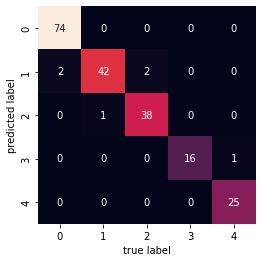

In [217]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_trues, y_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [218]:
precision = precision_score(y_trues, y_predictions, average = 'weighted')
precision

0.9716121993481996

In [219]:
recall = recall_score(y_trues, y_predictions, average = 'weighted')
recall

0.9701492537313433

In [220]:
f1score = f1_score(y_trues, y_predictions, average= 'weighted')
f1score

0.9704343113502426

In [224]:
# 테스트 문장 예측
test_sentence = '요즘 야구가 재미있어'
test_label = 3

unseen_test = pd.DataFrame([[test_sentence, test_label]], columns = [['convrs', 'cluster']])
unseen_values = unseen_test.values
test_set = BERTDataset(unseen_values, 0, 1, tok, max_len, True, False)
test_input = torch.utils.data.DataLoader(test_set, batch_size=1, num_workers=5)

for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  out = model(token_ids, valid_length, segment_ids)
  print(out)

<ipython-input-224-0849d1e84b35>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_input)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2193,  5.9775, -1.3191, -1.6523, -1.3738]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [233]:
class summarization():
  def __init__(self,convrs,model):
        self.model = model
        self.convrs = convrs

  def summarize(self):
    self.summ = ['골프, 탁구, 볼링, 당구 등 전반적인 구기종목에 대한 내용이', 
                 '프로야구에 관련한 내용이', 
                 '우리나라의 스포츠, 운동선수, 축구에 관련한 내용이' ,
                 '운동실력 향상을 위한 연습 또는 자전거에 관련한 내용이',
                 '건강을 위한 운동에 관련한 내용이']
    self.summ_result = [0 for i in range(5)]
    self.len = len(self.convrs)
    for i in self.convrs:
      print(i)
      data = [i, '0']
      dataset_another = [data]
      another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
      test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
     
      model.eval()

      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        print(out)

        for i in out:
          logits=i
          logits = logits.detach().cpu().numpy()
          print("주제 : " , np.argmax(logits))
          self.summ_result[np.argmax(logits)]+=1
          print()
    for i in range(len(self.summ)):
      print(self.summ[i], self.summ_result[i]/self.len*100, "% 차지합니다." )

## 새로운 문장으로 분류

In [234]:
lst = ['내가 어제 뭘 했냐면', '자전거를 탔는데', '넘어질 것 같더라고', '그래서 연습을 얼마나 했는지 몰라', '꾸준히 하면 괜찮아 지겠지?', '잘 해보고 싶은데 그게 잘 안돼']
conv1 = summarization(lst, model)
conv1.summarize()

내가 어제 뭘 했냐면


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
<ipython-input-233-832c44bebf70>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1822, -1.6450, -1.6189, -1.6201, -1.5939]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

자전거를 탔는데


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2794, -1.5955, -1.5201,  5.4197, -1.3479]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

넘어질 것 같더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.0342, -1.5582, -3.2950, -0.3264,  0.1382]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그래서 연습을 얼마나 했는지 몰라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2848, -1.5589, -1.5407,  5.4201, -1.3548]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

꾸준히 하면 괜찮아 지겠지?


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1702, -1.7375, -1.6717, -1.6033, -1.4636]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

잘 해보고 싶은데 그게 잘 안돼


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1843, -1.6705, -1.6406, -1.5786, -1.5903]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

골프, 탁구, 볼링, 당구 등 전반적인 구기종목에 대한 내용이 66.66666666666666 % 차지합니다.
프로야구에 관련한 내용이 0.0 % 차지합니다.
우리나라의 스포츠, 운동선수, 축구에 관련한 내용이 0.0 % 차지합니다.
운동실력 향상을 위한 연습 또는 자전거에 관련한 내용이 33.33333333333333 % 차지합니다.
건강을 위한 운동에 관련한 내용이 0.0 % 차지합니다.


In [235]:
lst2 = ['어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고',
  '가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고',
  '그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아',
  '유남규 선수가 설명을 잘해 주더라고',
  '나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고',
  '나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든',
  '확실히 받아보니까 조금 낫긴 하더라고',
  '근데 육만 원이야',
  '그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애',
  '잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고',
  '십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고',
  '그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애',
  '그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라',
  '다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라',
  '이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고',
  '그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고',
  '근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아',
  '나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구',
  '그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네',
  '사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구',
  '내가 자신이 없으니까 나가는게 두렵더라구',
  '그런데 대회 같은 데 가서 구경하는 거는 재밌더라',
  '근데 한 번이 힘들지 계속 나가니까 재밌더라구',
  '조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어',
  '진짜 친구가 권하니까 나도 용기를 내보고 싶긴해',
  '그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아',
  '같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네',
  '젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네',
  '언제 한 번 우리도 나가 볼까',
  '하여튼 한 번 나가 보면 같애',
  '내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야',
  '또 시합 나가면 다른 친구들도 보잖아',
  '확실히 동사무소에서만 치는 탁구하고는 다르거든',
  '그러니까 한 번 나가 보는 것도 좋을 것 같애',
  '친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야',
  '그렇게 하다 보면 실력이 늘겠지 알겠어',
  '그리고 나는 요즘에 허리가 조금 안 좋거든',
  '우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라',
  '누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든',
  '근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애',
  '시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애',
  '지미 걔는 건강하게 보여 타고 났나 봐',
  '그러니까 나이가 그 정도 되면 어디 아프고 그러거든요',
  '근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고',
  '그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든',
  '그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐',
  '그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고',
  '나는 이상하게 그런걸 못 느끼나봐',
  '친정이 시골이거든',
  '한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고',
  '그런데 탁구 배드민턴보다 반경이 좁잖아',
  '그러니까 탁구는 좀 해 보니까 편한 것 같애',
  '나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애',
  '나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든',
  '왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든',
  '그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고',
  '나는 에이스들이 치는데 보다',
  '그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라',
  '우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든',
  '너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어',
  '나도 모르게 피식하고 웃는다니까 지미는 그렇구나',
  '나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고',
  '내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고',
  '거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야',
  '나도 똑같애',
  '복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐',
  '하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고',
  '그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고',
  '그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아',
  '그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애',
  '나는 처음 배운 운동으로 탁구를 배웠잖아',
  '내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애',
  '우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야',
  '몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요',
  '그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고',
  '나는 탁구를 못 쳐서 자신감이 없어',
  '왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고',
  '그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아',
  '여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라',
  '그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고',
  '나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라',
  '그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지',
  '노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐',
  '어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아',
  '나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라',
  '잘 칠 수 있도록 노력을 해 봐야겠지',
  '나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지',
  '조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼',
  '그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구',
  '잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와',
  '그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어',
  '진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아',
  '내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아',
  '그런데 그 한별이가 공을 던져주고서 때리라고 했거든',
  '근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고',
  '근데 공 보기가 엄청 어렵더라고',
  '딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라',
  '친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어',
  '자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고',
  '어제 나도 똑같이 그걸 했거든',
  '그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어',
  '뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애']
conv2 = summarization(lst2, model)

In [236]:
conv2.summarize()

어제 탁구 시합할 때 빽 서브 연습을 안 하고 하니까 서브가 그게 잘 들어가던데 잘 안되더라 연습을 하고 가야겠어 연습을 조금만 하니까 공이 허공으로 뜨고 그러니까 상대방이 바로 때리니까 안 좋기는 안 좋더라고


<ipython-input-233-832c44bebf70>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2530, -1.5758, -1.5745,  5.4154, -1.3487]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

가끔가다 한 번씩 때려주면 좋을 텐데 진짜 시합 할 때 빽 서브도 좋지만 화서브도 넣고 커트도 잘 되는데 커트가 잘 안될 때도 있잖 근데 빽 서브만 넣으면 안 되겠어 화서브 넣어도 상대방이 잘 알아서 때리니까 좀 그렇더라고 처음에 서브 넣으면 막 때리고 그러니까 한 번 때려 갖고 들어가면 기분이 안좋고 그날 진짜 플레이가 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2359, -1.5927, -1.5883,  5.4145, -1.3358]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그런데 커트로 수비도 잘 하고 스매싱도 잘 하는데 단식보다 이제 복식 하면 뒤에서 스매싱으로 때려주면 되고 앞에서 수비 잘 하면 게임이 유리한 것 같은데 때리고 그러면 좀 실수가 많은 거 같지 않아 엊그제는 유튜브를 봤는데 유남규 선수 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3331,  5.9830, -1.2797, -1.5899, -1.3325]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

유남규 선수가 설명을 잘해 주더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5108, -1.2920,  6.0808, -1.3768, -1.3031]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

나도 유튜브를 본지 얼마 안됐는데 그게 도움이 많이 되는 거 같더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2202, -1.3805,  6.0413, -1.5155, -1.3776]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

나도 가끔씩 보면 충분히 나도 할 수 있을 것 같은데 막상 게임 할 때는 잘 안 되더라고 맞아 그래서 연습을 많이 해야 할 것 같아 근데 나는 너무 안되서 레슨을 조금 받는데 하루에 십분 씩해서 일주일에 두 번 받거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2703, -1.5793, -1.5549,  5.4191, -1.3395]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

확실히 받아보니까 조금 낫긴 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.6564, -0.3337, -1.5007, -1.8304,  5.3979]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

근데 육만 원이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-0.7186, -1.6752, -1.9520,  5.2789, -1.4413]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그게 확 티는 안나도 레슨 받은게 도움이 되고 오래 친 사람들도 계속 연습하면서 일 년에 한두 번씩 레슨을 받는다니까 그러니까 그렇게 잘 치는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2563, -1.5797, -1.5623,  5.4170, -1.3496]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

잘 하는 분인데 내가 물어봤어 요즘에 많이 좋아졌더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1867, -1.6486, -1.6740, -1.5774, -1.5766]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

십분 정도 레슨을 받는데 잘하는 사람이랑 하니까 그 사람이 실수가 많이 줄었더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1906, -1.6084, -1.6982, -1.5503, -1.6106]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그런데 또 잘 치는 사람들을 구경을 하는 것도 큰 도움이 되는 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1896, -1.4786, -1.7201, -1.5979, -1.6413]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그지 나도 비슷하게라도 흉내를 낼라고 하면서 그것도 맞는 거 같어 내가상대방이 치는걸 보는데 내가 좀 해 볼라고 하면 잘 안 되고 좀 그렇더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1840, -1.6645, -1.6355, -1.5983, -1.5793]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

다른 사람이 치는건 잘 보이는데 내가 칠 땐 잘 안되니까 어려워 생활 체육이지만 되게 탁구가 어려운거 같아 내가 배드민턴을 오래 쳐서 그런가 그건 좀 쉬운 거 같은데 탁구는 어렵더라고 사람들이 그러다라고 꾸준히 나가도 어떨 때 속상할때가 많아 내가 너무 못 치는거 같으니까 그래서 그만 둘까 하니까 사람들이 그러더라고 치라고 여러모로 운동 되고 머리 쓰니까 좋다고 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1908, -1.6235, -1.7171, -1.5322, -1.5955]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

이렇게 마음 맞는 친구들하고 같이 운동을 하니까 너무 시간도 잘 가고 건강에도 좋고 너무 너무 좋아 그러니까 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1863, -1.6725, -1.7046, -1.5406, -1.5576]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그리고 웃으면서 치니까 활력도 생기고 좋기는 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5650,  0.1221, -1.4146, -1.5498,  5.4989]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

근데 내가 탁구 실력이 늘었으면 좋겠다는 마음이 들더라고 꾸준히 나가서 열심히 치면 늘겠지 정리동 탁구장에는 사람들이 많이 쳐줘서 좋아 그래야 또 잘 치는 사람들이랑 어울려서 웃고 놀지 그렇게 하고 싶은데 잘 안 되더라고 그래도 처음부터 잘 하는 사람은 많이 없을 거 같아 벌써 그렇게 되니 게임도 많이 하고 연습도 하잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1901, -1.6292, -1.7230, -1.5078, -1.6102]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나는 이제는 조금 늘겠라는 생각이 들더라구 한 번 나가고 싶어 내 탁구 실력이 어느정도 되는지 궁금해 그런 데 한 번 나가 보면 지더라도 되게 실력이 오르더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2827, -1.5614, -1.5495,  5.4203, -1.3462]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그래서 한 번 시도를 해 보는 게 좋을 것 같은데 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1886, -1.6257, -1.6713, -1.5662, -1.6101]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

사람들이 내 실력이 많이 늘어서 대회 나가는걸 추천 하더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5032, -1.3033,  6.0782, -1.3639, -1.3187]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

내가 자신이 없으니까 나가는게 두렵더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1838, -1.6639, -1.6328, -1.6006, -1.5805]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그런데 대회 같은 데 가서 구경하는 거는 재밌더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5391, -1.2245,  6.0806, -1.3785, -1.3461]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

근데 한 번이 힘들지 계속 나가니까 재밌더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1902, -1.6272, -1.7049, -1.5374, -1.6002]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

조금씩 실력이 늘면 자꾸 나가고 싶을 것 같기도 해 나도 다음에는 한 번 나갈 수 있으면 좋겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3137, -1.5505, -1.5434,  5.4228, -1.3270]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

진짜 친구가 권하니까 나도 용기를 내보고 싶긴해


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1821, -1.6749, -1.6832, -1.5999, -1.5146]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그리고 잘할지 못 할지 몰라도 한 번 생각해 볼게 구 대회도 나가고 잘 하다보면 시 대회도 나갈 있잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5689, -1.1898,  6.0819, -1.3550, -1.3675]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

같이 운동할 수 있다는 게 얼마나 좋아 그치 나도 나이가 많아서 남들처럼 잘 할려나 모르겠네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1868, -1.6626, -1.6802, -1.5530, -1.5810]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

젊은 사람들이 탁구치는거 보면 잘하는데 난 자신이 없네


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1783, -1.6946, -1.5995, -1.6109, -1.5796]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

언제 한 번 우리도 나가 볼까


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1882, -1.6366, -1.6730, -1.5538, -1.6115]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

하여튼 한 번 나가 보면 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1741, -1.6711, -1.8416, -1.3023, -1.6469]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

내가 친구 믿고 열심히 해서 한 번 나가 보자고 좋은 생각이야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1876, -1.6414, -1.6633, -1.5744, -1.5949]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

또 시합 나가면 다른 친구들도 보잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1830, -1.6941, -1.6604, -1.5512, -1.5762]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

확실히 동사무소에서만 치는 탁구하고는 다르거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1815, -1.7045, -1.6473, -1.5704, -1.5603]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그러니까 한 번 나가 보는 것도 좋을 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1864, -1.6671, -1.6718, -1.5516, -1.5877]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

친구 믿고 내가 열심히 해서 한 번 나가 볼께 다른 사람들 치는거 보면서 매일 연습하면 될 거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2230, -1.5864, -1.5825,  5.4121, -1.3644]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그렇게 하다 보면 실력이 늘겠지 알겠어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2976, -1.5595, -1.5458,  5.4207, -1.3369]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그리고 나는 요즘에 허리가 조금 안 좋거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4915, -0.0633, -1.4023, -1.5296,  5.5523]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

우리 집이 십이 층이여 그렇게 하니까 좋아지는 거 같더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1743, -1.6868, -1.5590, -1.6521, -1.5841]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

누가 그러더라 다리랑 허리에 좋은 운동이 계단 타는거라고 뭐 안 좋은데는 아직 없거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4723, -0.1092, -1.3968, -1.5248,  5.5639]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

근데 이제 조심은 해야지 나이가 있잖 그냥 일주일에 한 번 정도는 산에 가면 좋을 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5421,  0.0263, -1.3943, -1.5411,  5.5267]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

시골가서 일 좀 하고 주중에 탁구 치는 게 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1875, -1.6550, -1.6794, -1.5498, -1.5921]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

지미 걔는 건강하게 보여 타고 났나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.1578, -0.7445,  5.7502, -1.4215, -2.0642]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그러니까 나이가 그 정도 되면 어디 아프고 그러거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5203, -0.0095, -1.4167, -1.5222,  5.5392]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

근데 내가 볼 때 남자보다 더 건강한 것 같고 기운도 좋아보여 내 다리가 안 아프려면 이렇게 산에 가는게 좋을거 같아 근데 다리가 안 좋았는지 조금 다리가 아프려고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4653, -0.1258, -1.3885, -1.5282,  5.5671]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

그래서 겁이 났는지 요즘에는 산에 안 가고 그랬거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1907, -1.5483, -1.7004, -1.5870, -1.6211]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그냥 나름대로 운동도 하고 건강 관리 하고 그러거든 지미는 시골 가서 일 하면 좀 힘들지 않아 아 힘든건 있어 있는데 또 시골에 가면 공기가 맑잖아 애들하고 먹으니까 좋은 거 같아 시골가서 일을 하니까 그렇게 어디 불편한 거는 아직 없어 그래도 열심히 운동은 열심히 해야지 지미는 마음이 착해 농사지어서 친척들 주고 친구들 주잖아 그러는 재미를 느끼나 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1886, -1.6381, -1.6860, -1.5464, -1.6043]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그러니까 시골에 가서 일하는 것도 힘이 안들어 보이더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1753, -1.7306, -1.7532, -1.4906, -1.5043]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나는 이상하게 그런걸 못 느끼나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1882, -1.6378, -1.6791, -1.5600, -1.5975]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

친정이 시골이거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 5.3136, -2.0596, -0.2433, -2.5982, -0.6795]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

한번 들에 나가서 할라고 하면 막 허리도 아프고 햇빛을 너무 못 이겨서 안하게 되더라고 배드민턴을 한 이십년 쳤고 탁구를 쳐봤는데 이제 나이가 있으니까 배드민턴은 뛰어야 하니까 힘들더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5094, -0.0239, -1.4211, -1.5174,  5.5439]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

그런데 탁구 배드민턴보다 반경이 좁잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1872, -1.6544, -1.6987, -1.5439, -1.5798]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그러니까 탁구는 좀 해 보니까 편한 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1880, -1.6473, -1.6833, -1.5541, -1.5900]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나이 먹어서도 탁구는 할 수 있는 운동이라 괜찮은 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1832, -1.6907, -1.6777, -1.5543, -1.5578]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나는 운동을 해본 적이 많이 없는데도 탁구를 배웠거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1813, -1.7051, -1.6548, -1.5590, -1.5650]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

왜냐하면 친구도 만나고 같이 치니까 좋더라고 탁구에 대해 얘기하다 보면 시간이 잘 가거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1910, -1.6087, -1.7050, -1.5520, -1.6009]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그리고 탁구 레슨을 해주는 선생님도 있어 활력도 생기고 많이 웃다보니 재밌더라고 탁구를 치다 보면 많이 웃게 되고 그렇더라고 그냥은 웃을 일이 별로 없지 승부욕이 많은 사람은 이기려 하는사람도 있고 꼭 하는 거보다 진짜 볼 만 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4364,  0.0998, -1.4391, -1.6159,  5.5012]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

나는 에이스들이 치는데 보다


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3302,  5.9823, -1.2842, -1.5787, -1.3430]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

그 밑에서 치는 게 더 좋아 왜냐하면 에이스에서 치는 사람들 보면 너무 삭막해 아주 서로 이기려고 눈에 불을 켜더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3305,  5.9829, -1.2800, -1.5852, -1.3388]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

우리는 못 치니까 에이스들이 치는 자리 밑에서 치거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3289,  5.9821, -1.2852, -1.5747, -1.3481]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

너무 못 치니까 사람들이 웃기더라고 공을 잘못 때려 가지고 어떤 때는 천정을 맞을 때도 있어 그냥 생각없이 친 공이 날라가니까 그런 재미로 나는 치는거 같아 그럴 수 있지 재밌게 치다 보면 나도 모르게 얼굴이 좋아지잖아 탁구치고 집에 와서 저녁 먹을 준비하잖아 밥을 다 하고 가만히 생각해 보면 낮에 탁구 쳤던 생각이 났어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1845, -1.4285, -1.7244, -1.6114, -1.6586]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나도 모르게 피식하고 웃는다니까 지미는 그렇구나


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1873, -1.6166, -1.6464, -1.5974, -1.6091]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나는 탁구를 치다 보면 사람들 성격이 다 다르니까 어제는 탁구치는데 어떤 사람들은 막 웃더라고 어떤 사람은 집중을 많이 해서 치니까 나는 에이스 쪽 가면 긴장돼 긴장하고 치려니까 마음대로 안 되더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1666, -1.2925, -1.9250, -1.5203, -1.6219]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

내가 긴장을 해서 치니까 잘 못 치면 막 뭐라고 할까봐 불안해 긴장해서 그런지 공이 잘 안 맞고 그러더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3291,  5.9844, -1.2703, -1.6032, -1.3281]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

거기서 즐기는 게 사람들하고 어울리기 쉽고 더 좋은가 봐 나도 마찬가지야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1893, -1.6146, -1.6692, -1.5752, -1.6105]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나도 똑같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1253, -1.7634, -1.3680, -1.8091, -1.5247]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

복식 칠 때 내가 실수라도 하면 옆 사람한테 미안해 잘 안됐을 때는 내 혼자 의기소침 하더라고 밑에에서 치면 마음 놓고 치다보니까 거기가 더 좋지 그래도 못 치는 사람이나 잘 치는 사람이나 다 고충이 있나봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1910, -1.5467, -1.7091, -1.5699, -1.6282]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

하여튼 나는 못 치더라도 탁구장에 갈 때는 기분이 좋더라고 가서 놀다 오는 게 기분 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1914, -1.6085, -1.7383, -1.5185, -1.5994]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그리고 탁구 치는 사람들이 다 마음이 좋은 거 같어 잘 가르쳐 주고 웃기기도 하고 안 그래 자세도 잘 잡아주기도 하고 여러모로 좋더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5553,  0.1286, -1.4153, -1.5623,  5.4958]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

그러면 그거는 다 똑같은 거 같아 그게 탁구는 상대방이 있잖아 복식으로 칠 때는 공이 왔던 곳으로 안 오잖아 다 틀린 대로 오잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1885, -1.6448, -1.7820, -1.4618, -1.5761]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그러니까 그게 좋은 거 같아 그리고 나이 먹어도 관절 같은 데 무리없이 할 수 있어 나는 그게 진짜 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4842, -0.0992, -1.4026, -1.5165,  5.5621]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  4

나는 처음 배운 운동으로 탁구를 배웠잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1816, -1.6982, -1.6389, -1.5733, -1.5730]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

내 생각에는 탁구장에서 친구를 만난다는게 좋은거 같아 탁구 치면서 더 친해지고 우리 우정 변치말자 계속 우리 웃으면서 탁구 열심히 치자고 그래 서로 노력하자고 동아리는 좋아하는 사람만 오는거 아니야 탁구가 좋아서 모이는거고 사람들이 순하고 다 좋은 거 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1888, -1.6438, -1.6871, -1.5517, -1.5905]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

우리도 동아리를 만들면 더 재밌지 않겠어 다함께 동아리를 만드는거야


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1814, -1.3817, -1.7956, -1.5614, -1.6654]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

몇 명이 모여서 만들어 모르는것도 가르쳐 주면서 그렇게 해서 같이 치고 그러면 더 재밌을거 같은데 여자들끼리 몇 명 안 되지만 그래도 나는 그게 좋을것 같은데 그래서 그 회장님이 그 얘기 했자나 같이 재밌게 치면 좋을 건데 왜 그렇게 안 치냐고 그래요 나는 회장님한테 그 소리는 못 들었거든요


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3019, -1.3349,  6.0532, -1.4344, -1.4217]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그러게 내 생각에도 에이스들이랑 치면 불안스러워 배울 점은 많은데 어딘가 모르게 편하지 않더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3343,  5.9835, -1.2772, -1.5902, -1.3305]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

나는 탁구를 못 쳐서 자신감이 없어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1723, -1.7290, -1.6013, -1.6166, -1.5353]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

왜냐면 내가 지면 나랑 같은 편이 기분 나빠할까 봐 들어가고 싶어도 마음이 불편하고 가서 한 번씩 하면 지더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1904, -1.6151, -1.7302, -1.5402, -1.5802]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그래서 내가 그 사람한테 미안하더라 그렇다 보니까 마음이 편하지는 않더라고 그냥 우리끼리 동아리를 만들어서 같이 하면 좋고 나는 웃고 즐기는게 좋을 것 같은아 윤 회장이 나한테 항상 그러잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1923, -1.5621, -1.7211, -1.5521, -1.6204]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

여기서 비슷한 사람끼리 재미있게 치면 좋을 건데 그러니까 슬기 오빠가 여자들이 치기에 부담없이 해주더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.3303, -1.3122,  6.0592, -1.4562, -1.3933]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그 오빠한테 많이 가르쳐 달라고 하면 좋아 나도 많이 배워 오빠가 워낙 마음이 좋으니까 사람들이 서로 많이 찾아 나는 차지도 들어가지도 않고 그런 거는 있기는 있더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1844, -1.6804, -1.6550, -1.5663, -1.5772]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나도 보미 한테 배워보고 싶은데 내가 먼저 얘기를 못 하겠어 미안해 가지고 나는 하루에 한 번 씩만 봐주면 실력이 엄청 늘 것 같은데 우리같이 못 치는 사람끼리 맨날 치면 그이도 재미없어 사람 잡기는 어렵기는 어렵더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2571, -1.5806, -1.5709,  5.4176, -1.3385]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

그리고 자주 안 오고 오늘은 오후에 오실 건데 오실려나 오후에 가서 한 번 열심히 또 쳐봐야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1797, -1.4392, -1.8971, -1.4104, -1.6609]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

노을이는 일주일에 한 두 번 오는데 요즘에는 안 오던데 계속 안 오고 그래서 지난번에는 그리고 보미 오면 내가 딴 사람보다 일찍 잡아달라고 하고 싶어 같이 하고 싶은 마음이 있어서 가 보면 안 오더라고 노을이도 바쁜가 봐


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1912, -1.5828, -1.6948, -1.5656, -1.6188]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

어디 뭐 하는 거 같아 다들 바쁘겠지 바쁘지만 그래도 탁구가 좋아서 오는 사람들이잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1893, -1.6313, -1.6935, -1.5504, -1.5976]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나도 남들 보다 잘 치고 싶은데 탁구장 가보면 다들 너무 열심히 하더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1881, -1.6462, -1.6726, -1.5615, -1.5940]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

잘 칠 수 있도록 노력을 해 봐야겠지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.0746, -1.7452, -1.2001, -1.9205, -1.5552]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

나도 지금보다 더 잘 쳐서 다른 사람이랑 칠 때도 이기고 싶어 세 번 정도 치면 두 번 정도는 이겨야지


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1873, -1.6157, -1.6421, -1.5972, -1.6159]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

조금 자신감도 생기고 좋을 텐데 그게 잘 안 돼


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 4.9623, -1.8694, -1.4110, -2.4600,  0.8111]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그런데 지미는 잘 쳐서 그런지 그냥 치는데 잘 치더라구


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1610, -1.2742, -1.8432, -1.5854, -1.6509]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

잘 치기는 뭘 잘 쳐 다 똑같지 지미랑 내가 같이 랠리를 해봤어 여자끼리 하면 쎄게 못치는데 친구는 틀리더라고 공 때리는 게 힘이 있어서 그런지 좀 쎄게 와


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.4049, -1.2877,  6.0698, -1.4386, -1.3594]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  2

그래서 진짜 탁구 더 잘 치면 남자한테는 밀리지 않을 것 같어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.0995, -1.7771, -1.6336, -1.7636, -1.2294]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

진짜 탁구는 반복해서 많이 해봐야 할 것 같아 시간을 많이 가지고 반복적으로 쳐야 느는거 같아 예를 들어서 오늘 삼십 분 한 시간 치잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1924, -1.5700, -1.7534, -1.5120, -1.6188]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

내일 또 삼십 분 한 시간 매일 이렇게 반복해서 하는 게 탁구를 몇 시간씩 친다고 느는 게 아닌 거 같아 이게 집중해서 해서 쳐야 할 것 같아 근데 어제 이슬이가 한별이 잡아주고 또 나오라고 했어 한별이 해주고서는 잔디도 해 준다고 했잖아


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1815, -1.4736, -1.8736, -1.4092, -1.6674]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그런데 그 한별이가 공을 던져주고서 때리라고 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1575, -1.6954, -1.9402, -1.4420, -1.3480]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

근데 사람들이 얘기를 들어도 피부로 직접 느끼지 못하거든 던져진 타이밍 보면 공이 떴다가 내려오잖아 내려온 순간에 때리니까 잘 들어가더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1840, -1.4850, -1.9118, -1.4324, -1.5858]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

근데 공 보기가 엄청 어렵더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.0470, -0.9265, -2.0275, -1.6014, -1.6092]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

딴 사람들은 그냥 공 오는 걸 기다렸다가 서있는 상태에서 확 때리는데 나는 공을 못 보겠더라고 실력이 없어서 그런지 공 오는 거를 못 보겠더라


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.2162, -1.5965, -1.5890,  5.4109, -1.3567]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  3

친구는 어때 어제 보미가 처음에는 민볼로 주다가 커트로 얇게도 줬어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1908, -1.6234, -1.7114, -1.5311, -1.6026]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

자기가 그렇게 주는 거 같더라고 그래 가지고 그거를 깎아 보라고 하더라고


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1900, -1.5480, -1.6910, -1.5738, -1.6410]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

어제 나도 똑같이 그걸 했거든


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1865, -1.6363, -1.6763, -1.5588, -1.6076]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

그렇게 반은 민볼로 반은 커트로 공을 깎아서 주더라고 스매싱도 해 보라고 친구는 스매싱 잘 들어갔어


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-1.5133,  5.7605, -1.6148, -0.7181, -1.5782]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  1

뭐 들어갈 때도 있고 안 들어갈 때도 있는데 어제는 그냥 괜찮았던 것 같애


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[ 6.1849, -1.6039, -1.8564, -1.4639, -1.5280]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
주제 :  0

골프, 탁구, 볼링, 당구 등 전반적인 구기종목에 대한 내용이 62.745098039215684 % 차지합니다.
프로야구에 관련한 내용이 6.862745098039216 % 차지합니다.
우리나라의 스포츠, 운동선수, 축구에 관련한 내용이 8.823529411764707 % 차지합니다.
운동실력 향상을 위한 연습 또는 자전거에 관련한 내용이 10.784313725490197 % 차지합니다.
건강을 위한 운동에 관련한 내용이 10.784313725490197 % 차지합니다.
